# Importing libraries and connecting to Google Drive

In [1]:
# Import
%pip install plotly==5.4.0
import plotly.express as px
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

     |████████████████████████████████| 25.3 MB 5.7 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [2]:
# Connect to Google drive to access required data and images.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Thresholding

In [ ]:
# Make a test image - basically just a curved gradient
temp = np.zeros((101,101))
for i in range(temp.shape[0]):
  for j in range(temp.shape[1]):
    temp[i,j] = i**2+j**2
temp = temp/np.max(temp)*255 # Rescale to [0, 255]
test3 = temp.astype('uint8')
plt.imshow(test3,'gray')
plt.show()

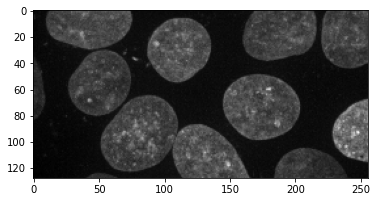

In [3]:
from skimage import data

# Get some data
test3 = data.cells3d() # Image of some cells
test3 = np.max(test3,0)[1,:,:]
test3 = (test3//256).astype('uint8')
test3 = test3[test3.shape[0]//2:]

# Show result
plt.imshow(test3,'gray')
plt.show()

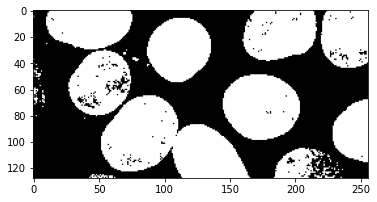

In [4]:
# Most basic threshold - fraction of mean - using cv2's built-in function
frac = 1
th = int(np.mean(test3) * frac)

t, thresh = cv2.threshold(test3,th,255,cv2.THRESH_BINARY)
plt.imshow(thresh, 'gray')
plt.show()

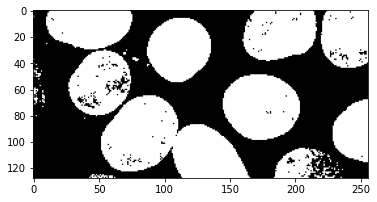

In [5]:
# Same threshold, but written by hand
frac = 1
t = np.mean(test3) * frac

thresh = test3.copy()
thresh[test3 < t] = 0
thresh[test3 >= t] = 1
plt.imshow(thresh, 'gray')
plt.show()

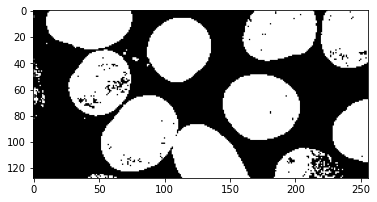

Threshold from Otsu: 56.0
Mean value of image: 57.5


In [6]:
# Same threshold using cv2 and Otsu
t, thresh = cv2.threshold(test3,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU) # Returns threshold, then mask
plt.imshow(thresh, 'gray')
plt.show()
print('Threshold from Otsu: {:.1f}'.format(t))
print('Mean value of image: {:.1f}'.format(np.mean(test3)))

# Morphological operations

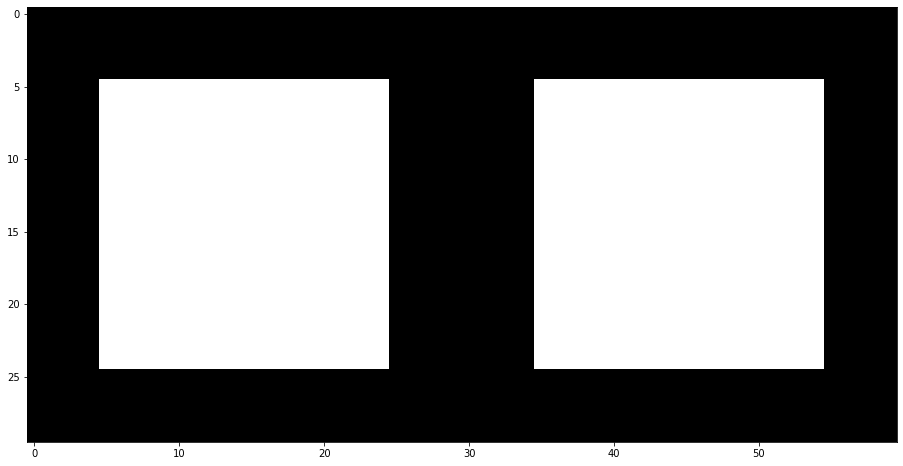

In [7]:
# Make a test 'image'
test1 = np.zeros((30,60))
test1[5:25,5:25] = 1
test1[5:25,35:55] = 1

plt.rcParams['figure.figsize'] = [18, 8]
plt.imshow(test1,'gray')
plt.show()

In [8]:
# Create some 'kernels' for morphological operations
squareKern = np.ones((5,5),np.uint8) # Square
ellipseKern = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)) # Slightly asymmetric, but nearly a circle
crossKern = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

squareKernBig = np.ones((10,10),np.uint8) # Square
ellipseKernBig = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10)) # Slightly asymmetric, but nearly a circle
crossKernBig = cv2.getStructuringElement(cv2.MORPH_CROSS,(10,10))

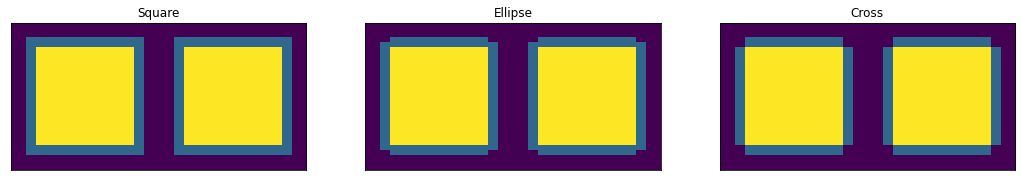

In [9]:
# Dilate
dilate1 = cv2.dilate(test1, squareKern)
dilate2 = cv2.dilate(test1, ellipseKern)
dilate3 = cv2.dilate(test1, crossKern)

# Display differences between original and dilated
images = [dilate1+2*test1, dilate2+2*test1, dilate3+2*test1] # Blue is the part that was gained
titles = ['Square', 'Ellipse', 'Cross']
plt.rcParams['figure.figsize'] = [18, 8]
for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(images[i],vmin=0,vmax=3)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

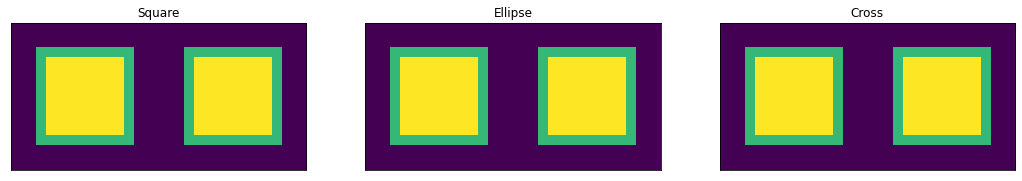

In [10]:
# Erode
ero1 = cv2.erode(test1, squareKern)
ero2 = cv2.erode(test1, ellipseKern)
ero3 = cv2.erode(test1, crossKern)

# Display differences between original and eroded
images = [ero1+2*test1, ero2+2*test1, ero3+2*test1] # Green is the part that was lost
titles = ['Square', 'Ellipse', 'Cross']
plt.rcParams['figure.figsize'] = [18, 8]
for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(images[i],vmin=0,vmax=3)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

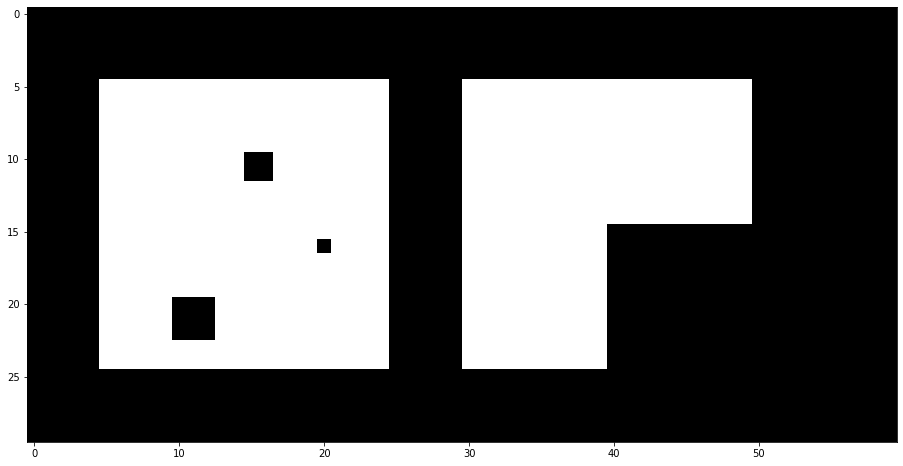

In [11]:
# Make a test 'image' for opening and closing
test2 = np.zeros((30,60))
test2[5:25,5:25] = 1
test2[5:25,30:50] = 1

nHoles = 20 
test2[10:12, 15:17] = 0
test2[20:23, 10:13] = 0
test2[16, 20] = 0
test2[15:26,40:51] = 0

plt.rcParams['figure.figsize'] = [18, 8]
plt.imshow(test2,'gray')
plt.show()

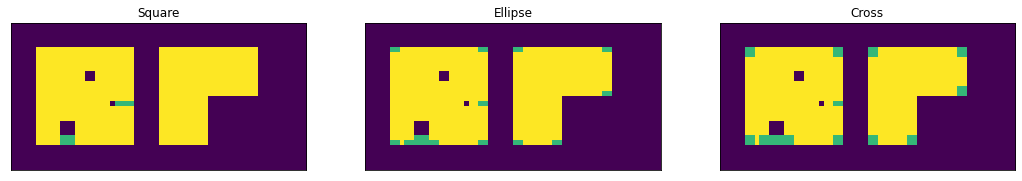

In [12]:
# Open
ope1 = cv2.morphologyEx(test2, cv2.MORPH_OPEN, squareKern)
ope2 = cv2.morphologyEx(test2, cv2.MORPH_OPEN, ellipseKern)
ope3 = cv2.morphologyEx(test2, cv2.MORPH_OPEN, crossKern)

# Display differences between original and opened
images = [ope1+2*test2, ope2+2*test2, ope3+2*test2] # Green is the part that was lost
titles = ['Square', 'Ellipse', 'Cross']
plt.rcParams['figure.figsize'] = [18, 8]
for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(images[i],vmin=0,vmax=3)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

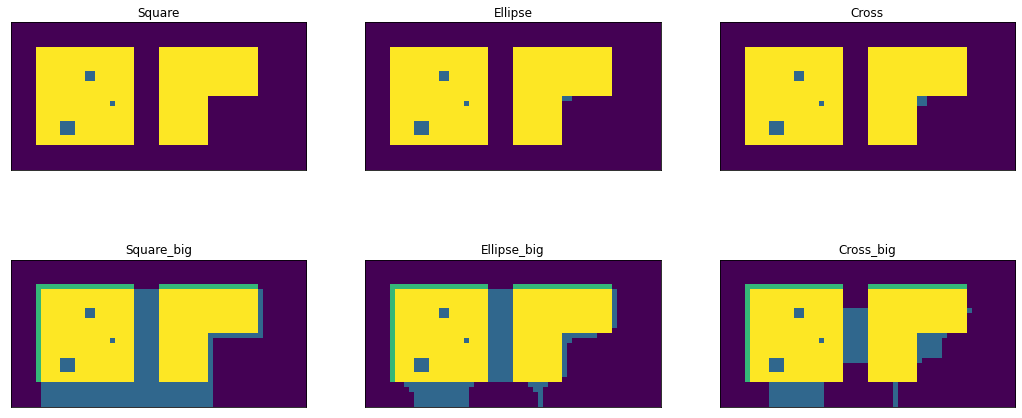

In [13]:
# Close
clo1 = cv2.morphologyEx(test2, cv2.MORPH_CLOSE, squareKern)
clo2 = cv2.morphologyEx(test2, cv2.MORPH_CLOSE, ellipseKern)
clo3 = cv2.morphologyEx(test2, cv2.MORPH_CLOSE, crossKern)
clo4 = cv2.morphologyEx(test2, cv2.MORPH_CLOSE, squareKernBig)
clo5 = cv2.morphologyEx(test2, cv2.MORPH_CLOSE, ellipseKernBig)
clo6 = cv2.morphologyEx(test2, cv2.MORPH_CLOSE, crossKernBig)

# Display differences between original and opened
images = [clo1+2*test2, clo2+2*test2, clo3+2*test2,
          clo4+2*test2, clo5+2*test2, clo6+2*test2] # Blue is the part that was gained
titles = ['Square', 'Ellipse', 'Cross',
          'Square_big', 'Ellipse_big', 'Cross_big']
plt.rcParams['figure.figsize'] = [18, 8]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],vmin=0,vmax=3)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

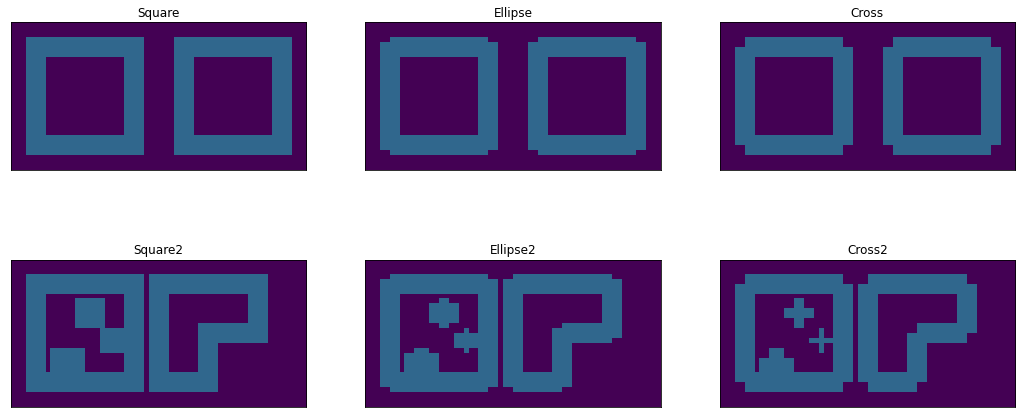

In [14]:
# Gradient
gra1 = cv2.morphologyEx(test1, cv2.MORPH_GRADIENT, squareKern)
gra2 = cv2.morphologyEx(test1, cv2.MORPH_GRADIENT, ellipseKern)
gra3 = cv2.morphologyEx(test1, cv2.MORPH_GRADIENT, crossKern)
gra4 = cv2.morphologyEx(test2, cv2.MORPH_GRADIENT, squareKern)
gra5 = cv2.morphologyEx(test2, cv2.MORPH_GRADIENT, ellipseKern)
gra6 = cv2.morphologyEx(test2, cv2.MORPH_GRADIENT, crossKern)

# Display results
images = [gra1, gra2, gra3,
          gra4, gra5, gra6]
titles = ['Square', 'Ellipse', 'Cross',
          'Square2', 'Ellipse2', 'Cross2']
plt.rcParams['figure.figsize'] = [18, 8]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],vmin=0,vmax=3)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()